In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/airquality/data.csv')

In [3]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,01-02-1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,01-02-1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,01-02-1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,01-03-1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,01-03-1990


In [4]:
df['type'].replace('Residential, Rural and other Areas','Residential',inplace = True)
df['type'].replace('Residential and others','Residential',inplace = True)
df['type'].replace('Industrial Areas','Industrial',inplace = True)
df['type'].replace('Industrial Area','Industrial',inplace = True)
df['type'].replace('Sensitive Area','Sensitive',inplace = True)
df['type'].replace('Sensitive Areas','Sensitive',inplace = True)

We have replaced all the similar types of locations and got them down to only 4 following categories:

Residential

Industrial

Sensitive

RIRUO

In [5]:
df['type'].value_counts()

Residential    265963
Industrial     148071
Sensitive       15011
RIRUO            1304
Name: type, dtype: int64

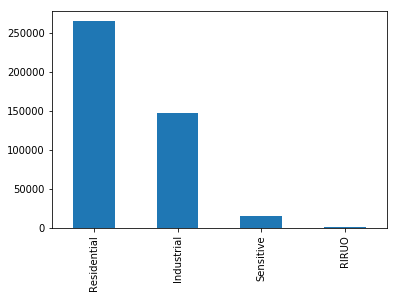

In [6]:
df['type'].value_counts().plot(kind = 'bar')

From the above figure we can see that the data was recorded more from the residential areas as compared to other areas.

In [7]:
g = df.groupby(['state','type'])
d = dict(list(g))
kar_ind = d[('Karnataka','Industrial')].median()
kar_res = d[('Karnataka','Residential')].median()
kar_sen = d[('Karnataka','Sensitive')].median()
print(kar_ind,kar_res,kar_sen)
# kar_riruo = d[('Karnataka','RIRUO')].mean()

stn_code    405.0
so2          10.7
no2          21.0
rspm         58.0
spm         112.0
pm2_5         NaN
dtype: float64 stn_code    457.0
so2           7.0
no2          20.0
rspm         64.0
spm         166.0
pm2_5         NaN
dtype: float64 stn_code    459.0
so2           8.0
no2          27.0
rspm         57.7
spm         162.0
pm2_5         NaN
dtype: float64


In [8]:
print(df['so2'].isnull().sum())
print(df['no2'].isnull().sum())

34646
16233


In [9]:
df.loc[(df['state'] == 'Karnataka') & (df['type'] == 'Industrial') & (df['so2'].isnull()),'so2'] = kar_ind['so2']
df.loc[(df['state'] == 'Karnataka') & (df['type'] == 'Residential') & (df['so2'].isnull()),'so2'] = kar_res['so2']
df.loc[(df['state'] == 'Karnataka') & (df['type'] == 'Sensitive') & (df['so2'].isnull()),'so2'] = kar_sen['so2']
# df.loc[(df['state'] == 'Karnataka') & (df['type'] == 'RIROU') & (df['so2'].isnull()),'so2'] = kar_rirou['so2']

In the above code we have replaced the na values for so2 in the state of karnataka with the medians depending on their type of locations 

In [10]:
df.loc[(df['state'] == 'Karnataka') & (df['type'] == 'Industrial') & (df['no2'].isnull()),'no2'] = kar_ind['no2']
df.loc[(df['state'] == 'Karnataka') & (df['type'] == 'Residential') & (df['no2'].isnull()),'no2'] = kar_res['no2']
df.loc[(df['state'] == 'Karnataka') & (df['type'] == 'Sensitive') & (df['no2'].isnull()),'no2'] = kar_sen['no2']
# df.loc[(df['state'] == 'Karnataka') & (df['type'] == 'RIROU') & (df['so2'].isnull()),'so2'] = kar_rirou['so2']

In the above code we have replaced the na values for no2 in the state of karnataka with the medians depending on their type of locations

In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df['year'] = df['date'].dt.year

In [13]:
df['year'].fillna(method = 'ffill',inplace = True)

In the above code we have extracted the year from the date replaced na values for the same with forward fill

In [14]:
df['year'] = df['year'].astype(int)

In [15]:
df['year'].isnull().sum()

0

In [16]:
d = dict(list(df[['location','year','so2','no2']].groupby('location')))

In [17]:
data = d['Bangalore'].groupby('year').median().reset_index()

In [18]:
data

,year,so2,no2
0,1988,24.700000,13.35
1,1989,21.900000,11.50
2,1990,17.800000,11.00
3,1991,16.300000,10.15
4,1992,8.850000,20.50
5,1995,10.700000,21.00
6,1996,20.800000,23.15
7,1997,27.200000,18.35
8,1998,36.500000,23.40
9,1999,36.000000,24.90


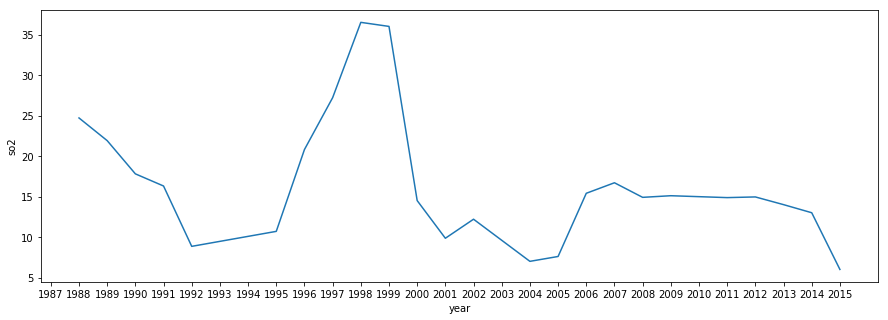

In [19]:
plt.figure(figsize=(15,5))
plt.xticks(np.arange(1980,2016))
sns.lineplot(x='year',y='so2',data=data)

From the above plot we can see that in BANGALORE there is an extreme peak in so2 level after 1995 till 1998. Furthur we see a sudden dip in so2 level in 1999 till 2000 which kept furthur gradually decreasing till 2005.

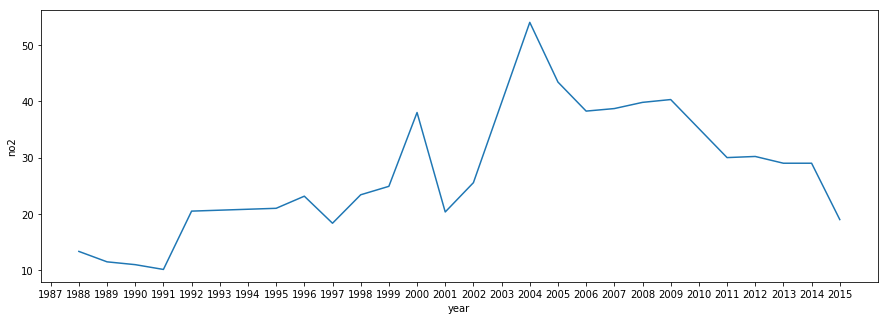

In [20]:
plt.figure(figsize=(15,5))
plt.xticks(np.arange(1980,2016))
sns.lineplot(x='year',y='no2',data=data)

From the above plot we can see that in BANGALORE there is an extreme peak in no2 level after 2001 till 2004 which gradually decreased after 2004.

---
---
---
---
---

In [21]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,Residential,4.8,17.4,NaN,NaN,NaN,NaN,1990-01-02,1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial,3.1,7.0,NaN,NaN,NaN,NaN,1990-01-02,1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,Residential,6.2,28.5,NaN,NaN,NaN,NaN,1990-01-02,1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,Residential,6.3,14.7,NaN,NaN,NaN,NaN,1990-01-03,1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial,4.7,7.5,NaN,NaN,NaN,NaN,1990-01-03,1990


In [22]:
print(df.rspm.isnull().sum())
print(df.spm.isnull().sum())

40222
237387


In [23]:
df1 = dict(list(df.groupby(['location','type'])))
data = pd.DataFrame()
for key in df1:
    df2 = df1[key].sort_values('date')
    df2['rspm'].fillna(method = 'ffill',inplace = True)
    df2['spm'].fillna(method = 'ffill',inplace= True)
    data = pd.concat([data,df2])

In the above code I have done a forward fill for spm and rspm NA data depending on its location and type of location.

In [24]:
df1 = dict(list(data.groupby(['location','type'])))
data1 = pd.DataFrame()
for key in df1:
    df2 = df1[key].sort_values('date')
    df2['rspm'].fillna(method = 'bfill',inplace = True)
    df2['spm'].fillna(method = 'bfill',inplace= True)
    data1 = pd.concat([data1,df2])

Furthurmore, if there are any values which are NA at first position according to location and type, I have done a backward fill for spm and rspm data depending on its location and type of location.

In [25]:
data1.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
101655,SAMP,01-06-2015,Gujarat,ANKLESHWAR,Gujarat State Pollution Control Board,RIRUO,24.0,26.0,86.0,NaN,"Panoli Ind.Asso. & Emergency Response Centre,P...",34.0,2015-01-06,2015
101598,SAMP,01-09-2015,Gujarat,ANKLESHWAR,Gujarat State Pollution Control Board,RIRUO,18.0,23.0,84.0,NaN,"GIDC OFFICE TERRACE, GIDC ESTATE JHAGADIA,ANKL...",38.0,2015-01-09,2015
101690,SAMP,01-10-2015,Gujarat,ANKLESHWAR,Gujarat State Pollution Control Board,RIRUO,23.0,26.0,84.0,NaN,"Panoli Ind.Asso. & Emergency Response Centre,P...",33.0,2015-01-10,2015
101543,SAMP,13-01-2015,Gujarat,ANKLESHWAR,Gujarat State Pollution Control Board,RIRUO,12.0,19.0,85.0,NaN,"GIDC OFFICE TERRACE, GIDC ESTATE JHAGADIA,ANKL...",29.0,2015-01-13,2015
101627,SAMP,15-01-2015,Gujarat,ANKLESHWAR,Gujarat State Pollution Control Board,RIRUO,12.0,20.0,76.0,NaN,"Panoli Ind.Asso. & Emergency Response Centre,P...",28.0,2015-01-15,2015


In [26]:
print(data1.rspm.isnull().sum())
print(data1.spm.isnull().sum())

4102
47909


In [27]:
df1 = dict(list(data1.groupby(['state','type'])))
data2 = pd.DataFrame()
for key in df1:
    df2 = df1[key]
    df2['rspm'].fillna(df2['rspm'].median(),inplace = True)
    df2['spm'].fillna(df2['spm'].median(),inplace= True)
    data2 = pd.concat([data2,df2])

Still we can see that there seem to be some locations with location types with all values as NA. Here the backward or forward fill won't work. So I have replaced such values with median grouped by state and location type.

In [28]:
print(data2.rspm.isnull().sum())
print(data2.spm.isnull().sum())

182
1972


In [29]:
data2

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial,3.1,7.0,90.3,82.000000,NaN,NaN,1990-01-02,1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial,4.7,7.5,90.3,82.000000,NaN,NaN,1990-01-03,1990
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial,4.7,8.7,90.3,82.000000,NaN,NaN,1990-01-04,1990
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial,4.0,8.9,90.3,82.000000,NaN,NaN,1990-01-05,1990
12,151,June - M061990,Andhra Pradesh,Hyderabad,NaN,Industrial,5.6,11.8,90.3,82.000000,NaN,NaN,1990-01-06,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434695,650,12-12-2015,West Bengal,South Suburban,West Bengal State Pollution Control Board,Residential,2.0,44.0,93.0,577.666667,"Baruipur, South Suburban",NaN,2015-12-12,2015
434696,650,14-12-2015,West Bengal,South Suburban,West Bengal State Pollution Control Board,Residential,2.0,47.0,145.0,577.666667,"Baruipur, South Suburban",NaN,2015-12-14,2015
434697,650,18-12-2015,West Bengal,South Suburban,West Bengal State Pollution Control Board,Residential,4.0,55.0,208.0,577.666667,"Baruipur, South Suburban",NaN,2015-12-18,2015
434698,650,20-12-2015,West Bengal,South Suburban,West Bengal State Pollution Control Board,Residential,3.0,49.0,206.0,577.666667,"Baruipur, South Suburban",NaN,2015-12-20,2015


In [30]:
df1 = dict(list(data2.groupby('type')))
data3 = pd.DataFrame()
for key in df1:
    df2 = df1[key]
    df2['rspm'].fillna(df2['rspm'].median(),inplace = True)
    df2['spm'].fillna(df2['spm'].median(),inplace= True)
    data3 = pd.concat([data3,df2])

Furthur any remaining NA values for rspm and spm have been replaced by medians grouped by type.

In [31]:
data3

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,year
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial,3.1,7.0,90.3,82.0,NaN,NaN,1990-01-02,1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial,4.7,7.5,90.3,82.0,NaN,NaN,1990-01-03,1990
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial,4.7,8.7,90.3,82.0,NaN,NaN,1990-01-04,1990
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial,4.0,8.9,90.3,82.0,NaN,NaN,1990-01-05,1990
12,151,June - M061990,Andhra Pradesh,Hyderabad,NaN,Industrial,5.6,11.8,90.3,82.0,NaN,NaN,1990-01-06,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408954,416,29-12-2015,Uttar Pradesh,Agra,Central Pollution Control Board,Sensitive,2.0,15.0,271.0,448.0,"Etmad-uddaulah, Agra",NaN,2015-12-29,2015
406660,1,30-12-2015,Uttar Pradesh,Agra,Central Pollution Control Board,Sensitive,2.0,34.0,352.0,448.0,"Taj Mahal, Agra",NaN,2015-12-30,2015
408838,415,30-12-2015,Uttar Pradesh,Agra,Central Pollution Control Board,Sensitive,4.0,36.0,427.0,448.0,"DIC Nunhai, Agra",NaN,2015-12-30,2015
406661,1,31-12-2015,Uttar Pradesh,Agra,Central Pollution Control Board,Sensitive,2.0,31.0,363.0,448.0,"Taj Mahal, Agra",NaN,2015-12-31,2015


In [32]:
print(data3.rspm.isnull().sum())
print(data3.spm.isnull().sum())

0
1304


In [33]:
data3['type'].value_counts()

Residential    265963
Industrial     148071
Sensitive       15011
RIRUO            1304
Name: type, dtype: int64

Still there is 'RIRUO' location type for which there exists NA values for spm.

In [34]:
data3.reset_index(inplace=True)

In [35]:
data3.drop(columns=['index','stn_code','sampling_date','agency','location_monitoring_station'],inplace = True)

The above columns don't seem to be very useful for any furthur analysis so I prefer to drop these colums to concentrate more on the essential features.

In [36]:
data3.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,90.3,82.0,NaN,1990-01-02,1990
1,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,90.3,82.0,NaN,1990-01-03,1990
2,Andhra Pradesh,Hyderabad,Industrial,4.7,8.7,90.3,82.0,NaN,1990-01-04,1990
3,Andhra Pradesh,Hyderabad,Industrial,4.0,8.9,90.3,82.0,NaN,1990-01-05,1990
4,Andhra Pradesh,Hyderabad,Industrial,5.6,11.8,90.3,82.0,NaN,1990-01-06,1990


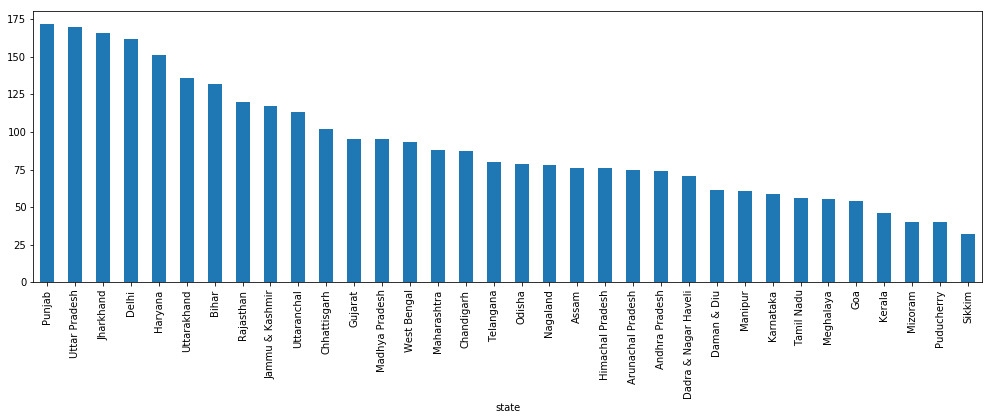

In [37]:
data3.groupby('state').median()['rspm'].sort_values(ascending = False).plot(kind = 'bar', figsize = (17,5))

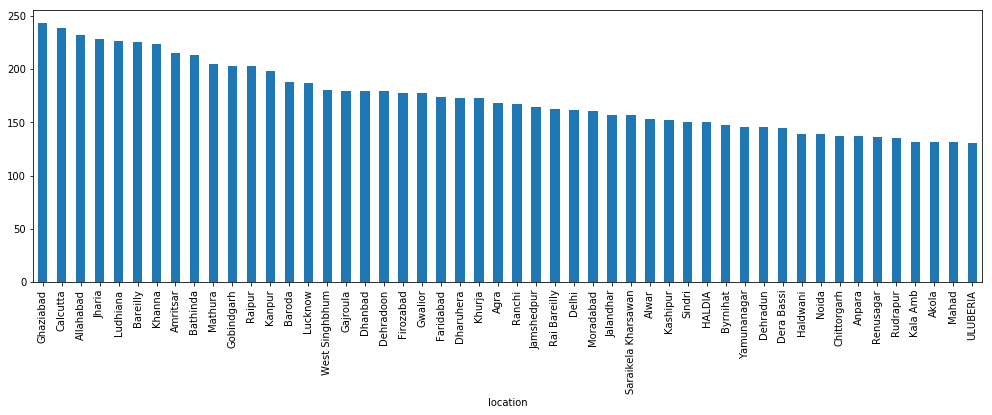

In [38]:
data3.groupby('location').median()['rspm'].sort_values(ascending = False).head(50).plot(kind = 'bar', figsize = (17,5))

It quite evident from the above plots that the rspm levels are high for the following cities from Uttar pradesh and Punjab: 

UP : Ghaziabad, Allahabad, Bareilly, Mathura, Khurja, Lucknow, Kanpur

Punjab : Ludhiana, Khanna, Amritsar, Bhatinda

We can verify the same with the following article from indian express in september 2008 : http://archive.indianexpress.com/news/khurja-state-s-most-polluted-town-lucknow-comes-second/360739/

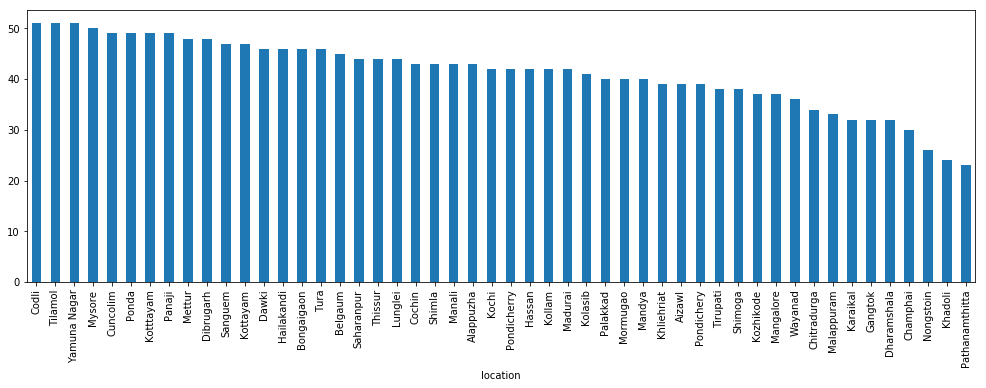

In [39]:
data3.groupby('location').median()['rspm'].sort_values(ascending = False).tail(50).plot(kind = 'bar', figsize = (17,5))

We can also see that the lowest rspm level are in Pathanamthitta which is a city in Kerela which is quite obvious as Kerela is among those states with lowest rspm levels

A very high rspm level could directly affect the people with many breathing/respiratory problems. 

---
---
---
---
---

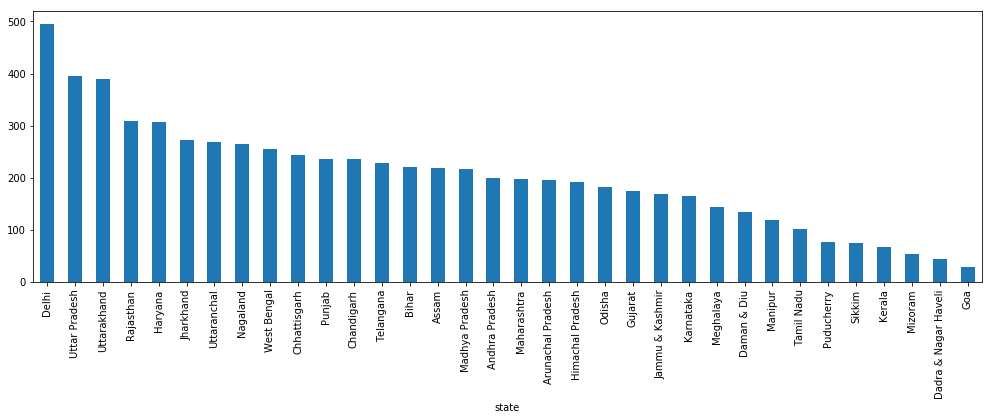

In [40]:
data3.groupby('state').median()['spm'].sort_values(ascending = False).plot(kind = 'bar', figsize = (17,5))

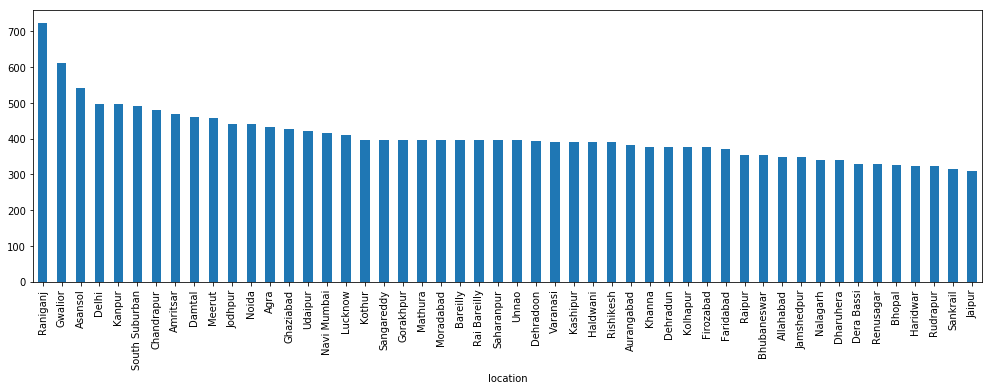

In [41]:
data3.groupby('location').median()['spm'].sort_values(ascending = False).head(50).plot(kind = 'bar', figsize = (17,5))

Similary we can see from the above plots that there is high level of spm for locations in Uttar Pradesh, Delhi and Rajasthan.